In [1]:
import os

import math
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

   # REGULAR EXPRESSIONS
import re  

   # PLOTTING
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

   # K NEAREST NEIGHBORS and LINEAR REGRESSION
from sklearn import preprocessing, linear_model, model_selection, metrics
from sklearn.model_selection import cross_val_score

   # STATS  
import scipy.stats as stats
import statsmodels.api as sm
   #smf.ols takes out NA values
import statsmodels.formula.api as smf  

from sklearn import feature_selection, linear_model

   # CLUSTERING, OPTIMIZATION
import scipy as sp

   # SQL DB ACCESS
import sqlite3

In [2]:
df = pd.read_csv(os.path.join('titanic-train.csv'))

In [3]:
df_test = pd.read_csv(os.path.join('titanic-test.csv'))

In [4]:
df.columns

Index([u'Unnamed: 0', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked', u'PassengerId'],
      dtype='object')

In [5]:
df = df[['Unnamed: 0', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'PassengerId', 'Survived']]
df.columns

Index([u'Unnamed: 0', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Embarked', u'PassengerId', u'Survived'],
      dtype='object')

In [6]:
df_test.columns

Index([u'Unnamed: 0', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Embarked', u'PassengerId'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,873.0,648.357388,377.179578,1.0000,322.0000,638.00000,972.0000,1307.0000
Pclass,873.0,2.300115,0.837325,1.0000,2.0000,3.00000,3.0000,3.0000
Age,701.0,29.560747,14.255972,0.1667,21.0000,28.00000,38.0000,76.0000
SibSp,873.0,0.469645,0.932003,0.0000,0.0000,0.00000,1.0000,8.0000
Parch,873.0,0.387171,0.831667,0.0000,0.0000,0.00000,0.0000,9.0000
Fare,872.0,32.368950,50.535715,0.0000,7.8958,14.47915,30.0177,512.3292
PassengerId,873.0,648.357388,377.179578,1.0000,322.0000,638.00000,972.0000,1307.0000
Survived,873.0,0.392898,0.488674,0.0000,0.0000,0.00000,1.0000,1.0000


In [8]:
# DROP UNNAMED COLUMN BECAUSE IT'S THE SAME AS PASSENGER ID
df.drop('Unnamed: 0', axis = 1, inplace = True)
df_test.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId,Survived
0,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C,1302,1
1,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,S,17,0
2,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,1049,1
3,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,S,388,1
4,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,S,1060,1
5,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,C,328,0
6,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,C,729,1
7,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,552,0
8,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,S,296,0
9,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,S,1257,0


In [10]:
# values 1, 2, 3
# df.Pclass.value_counts()
   # values male, female
# df.Sex.value_counts()
   # values 0, 1, 2, 3, 4, 5, 8
# df.SibSp.value_counts()
   # values 0, 1, 2, 3, 4, 5, 6, 9
# df.Parch.value_counts()
   # values S, C, Q
df.Embarked.value_counts()

S    618
C    172
Q     81
Name: Embarked, dtype: int64

In [11]:
# CREATE DUMMY VARIABLES FOR ALL CATEGORICAL VARIABLES
pclass_df = pd.get_dummies(df.Pclass, prefix = 'Pclass')
sex_df = pd.get_dummies(df.Sex, prefix = 'Sex')
embk_df = pd.get_dummies(df.Embarked, prefix = 'Embk')
df = df.join([pclass_df, sex_df, embk_df])

In [12]:
pclass_df_test = pd.get_dummies(df_test.Pclass, prefix = 'Pclass')
sex_df_test = pd.get_dummies(df_test.Sex, prefix = 'Sex')
embk_df_test = pd.get_dummies(df_test.Embarked, prefix = 'Embk')
df_test = df_test.join([pclass_df, sex_df, embk_df])

In [13]:
df.SibSp = df.SibSp.apply(lambda value: 0 if value == 0 else 1)
df.Parch = df.Parch.apply(lambda value: 0 if value == 0 else 1)

In [14]:
# CHECK FOR CORRELATION VALUES
df.corr()

,Pclass,Age,SibSp,Parch,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embk_C,Embk_Q,Embk_S
Pclass,1.000000,-0.377474,-0.059207,-0.045263,-0.557365,0.025241,-0.338951,-0.885321,-0.184690,0.915778,-0.131005,0.131005,-0.270560,0.225001,0.100929
Age,-0.377474,1.000000,-0.123762,-0.256833,0.139542,0.020005,-0.034977,0.350223,0.015443,-0.324320,-0.078594,0.078594,0.065213,0.006876,-0.073141
SibSp,-0.059207,-0.123762,1.000000,0.395340,0.174290,-0.029621,0.101628,0.052056,0.011698,-0.054532,0.245529,-0.245529,0.027380,-0.065327,0.021166
Parch,-0.045263,-0.256833,0.395340,1.000000,0.208772,0.029030,0.190393,0.021925,0.046716,-0.057128,0.289804,-0.289804,0.052470,-0.117992,0.032258
Fare,-0.557365,0.139542,0.174290,0.208772,1.000000,-0.028013,0.257220,0.597318,-0.116848,-0.420613,0.166503,-0.166503,0.275256,-0.116319,-0.171316
PassengerId,0.025241,0.020005,-0.029621,0.029030,-0.028013,1.000000,0.006311,-0.015120,-0.019936,0.029358,-0.025359,0.025359,-0.009767,-0.018663,0.019307
Survived,-0.338951,-0.034977,0.101628,0.190393,0.257220,0.006311,1.000000,0.299439,0.063957,-0.310959,0.527721,-0.527721,0.144005,-0.030919,-0.112497
Pclass_1,-0.885321,0.350223,0.052056,0.021925,0.597318,-0.015120,0.299439,1.000000,-0.293471,-0.623982,0.102397,-0.102397,0.326959,-0.154705,-0.196125
Pclass_2,-0.184690,0.015443,0.011698,0.046716,-0.116848,-0.019936,0.063957,-0.293471,1.000000,-0.563909,0.052907,-0.052907,-0.134818,-0.135596,0.207035
Pclass_3,0.915778,-0.324320,-0.054532,-0.057128,-0.420613,0.029358,-0.310959,-0.623982,-0.563909,1.000000,-0.131706,0.131706,-0.172247,0.244487,0.000191


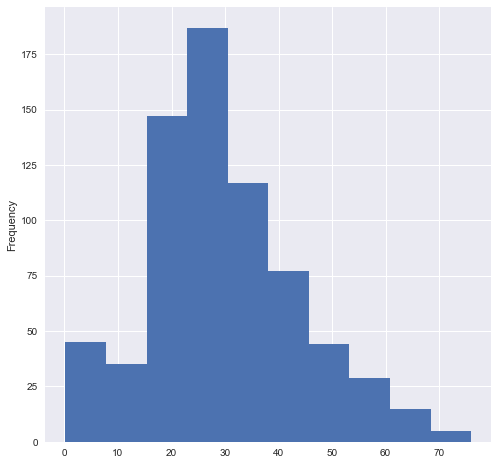

In [15]:
# WE CAN SEE THAT AGE HAS AN EFFECT ON SURVIVAL
df.Age.plot(kind = 'hist', figsize = (8, 8))

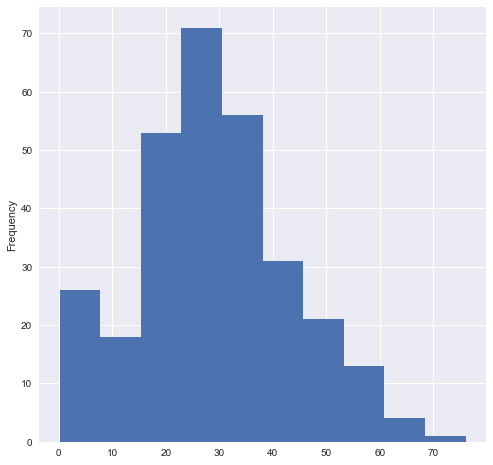

In [16]:
# WE CAN SEE THAT AGE HAS AN EFFECT ON SURVIVAL
df.Age[df.Survived==1].plot(kind = 'hist', figsize = (8, 8))

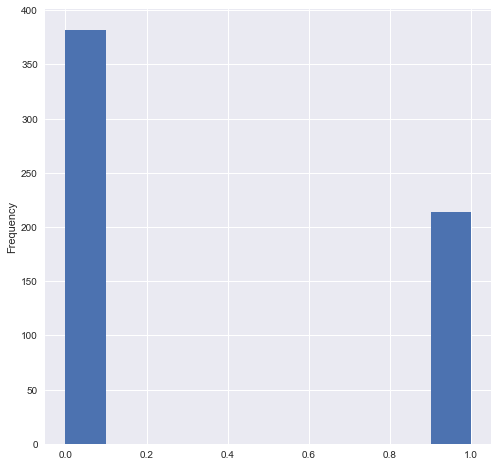

In [17]:
# WE CAN SEE THAT AGE HAS AN EFFECT ON SURVIVAL
df.Survived[df.SibSp==0].plot(kind = 'hist', figsize = (8, 8))

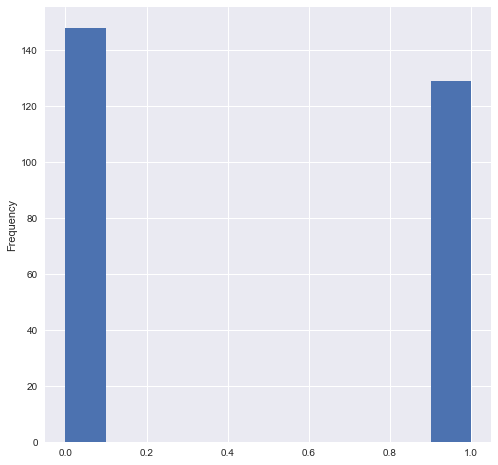

In [18]:
# WE CAN SEE THAT SIBSP HAS AN EFFECT ON SURVIVAL
df.Survived[df.SibSp>0].plot(kind = 'hist', figsize = (8, 8))

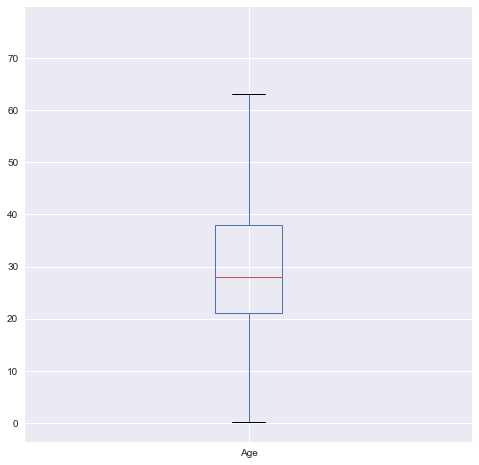

In [19]:
# DO WE HAVE ANY OUTLIERS in AGE?
df[ ['Age'] ].plot(kind = 'box', figsize = (8, 8))

In [20]:
# put the median age into the missing Age values
df.Age.loc[864]

nan

In [21]:
df.Age.fillna(df.Age.median(), inplace = True)
df.Age.loc[864]

28.0

In [22]:
df_test.Age.fillna(df.Age.median(), inplace = True)


In [23]:
# which row had the null Fare?
df[df.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embk_C,Embk_Q,Embk_S
244,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,178,0,0,0,1,0,1,0,0,1


In [24]:
df.Fare[df.Pclass==3].mean()

12.947551578947374

In [25]:
df.Fare.fillna(df.Fare[df.Pclass==3].mean(), inplace = True)
df_test.Fare.fillna(df.Fare[df.Pclass==3].mean(), inplace = True)

In [26]:
names_X = ['Sex_male', 'Age', 'SibSp','Parch','Fare',
           'Pclass_1', 'Pclass_2',
           'Embk_C', 'Embk_Q', ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_


[ 0.82696937]
[[ -2.39795299e+00  -2.10433535e-02  -3.33635340e-01   2.06636491e-01
    1.80815373e-03   1.85017053e+00   9.22502194e-01   3.34060635e-01
    3.48972529e-02]]


In [27]:
print 'training misclassification =', 1 - model.score(train_X, train_c)

training misclassification = 0.225658648339


In [28]:
zip(names_X, np.exp(model.coef_[0]) - 1)

[('Sex_male', -0.90909615622524154),
 ('Age', -0.020823487080663394),
 ('SibSp', -0.28368505410009026),
 ('Parch', 0.22953554298303125),
 ('Fare', 0.0018097894272373072),
 ('Pclass_1', 5.3609041636070893),
 ('Pclass_2', 1.5155769824899052),
 ('Embk_C', 0.39662782556471932),
 ('Embk_Q', 0.035513307392807114)]

In [29]:
print cross_val_score(model,train_X, train_c, cv=5).mean()

0.765136288998


In [30]:
# took out Fare
names_X = ['Sex_male', 'Age', 'SibSp','Parch',
           'Pclass_1', 'Pclass_2',
           'Embk_C', 'Embk_Q', ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.83185842]
[[-2.39995432 -0.02103019 -0.31677968  0.24368665  1.95909025  0.93722078
   0.36043946  0.04338951]]
0.770883415435


In [31]:
# took out Age
names_X = ['Sex_male', 'SibSp','Parch',
           'Pclass_1', 'Pclass_2',
           'Embk_C', 'Embk_Q']

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.29673069]
[[-2.42100039 -0.31842471  0.35774984  1.70298126  0.83395016  0.37802731
  -0.00274125]]
0.768610837438


In [32]:
# took out Embark
names_X = ['Sex_male', 'SibSp','Parch',
           'Pclass_1', 'Pclass_2'
           ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.33737983]
[[-2.40776658 -0.31851377  0.38421295  1.80049359  0.81543066]]
0.770909688013


In [33]:
# took out SibSp  
names_X = ['Sex_male', 'Parch',
           'Pclass_1', 'Pclass_2'
           ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.23362726]
[[-2.35804973  0.26841075  1.78774957  0.81869265]]
0.773208538588


In [34]:
# took out Parch  
names_X = ['Sex_male', 
           'Pclass_1', 'Pclass_2'
           ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.33850134]
[[-2.41936692  1.79023819  0.82512085]]
0.77665681445


In [35]:
# put Emb back in and Parch
names_X = ['Sex_male', 'Parch',
           'Pclass_1', 'Pclass_2', 'Embk_C', 'Embk_Q'
           ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.1843775]
[[-2.36821976  0.24534734  1.69335353  0.84250887  0.3807634   0.02787563]]
0.769753694581


In [36]:
# put Age back in 
names_X = ['Sex_male', 'Age',
           'Pclass_1', 'Pclass_2'
           ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.87037267]
[[-2.37414291 -0.0224307   2.05176687  0.92632213]]
0.778903119869


In [37]:
df['man_lowerclass']=df.Sex_male*df.Pclass_3
df_test['man_lowerclass']=df_test.Sex_male*df_test.Pclass_3

In [38]:

df


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embk_C,Embk_Q,Embk_S,man_lowerclass
0,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C,1302,1,1,0,0,1,0,1,0,0,0
1,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,S,17,0,0,0,1,0,1,0,0,1,1
2,1,"Frauenthal, Dr. Henry William",male,50.0,1,0,PC 17611,133.6500,S,1049,1,1,0,0,0,1,0,0,1,0
3,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,S,388,1,0,0,1,0,1,0,0,1,1
4,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,S,1060,1,0,1,0,1,0,0,0,1,0
5,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,C,328,0,0,1,0,0,1,1,0,0,0
6,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,C,729,1,0,0,1,0,1,1,0,0,1
7,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,552,0,0,0,1,0,1,0,0,1,1
8,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,1,347082,31.2750,S,296,0,0,0,1,1,0,0,0,1,0
9,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,S,1257,0,0,0,1,0,1,0,0,1,1


In [39]:
# add in man_lowerclass
names_X = ['Sex_male', 'Age',
           'Pclass_1', 'Pclass_2', 'man_lowerclass'
           ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.63734473]
[[-3.04447323 -0.02285702  2.80039846  1.5318767   1.20434703]]
0.772032840722


In [40]:
df['child']=(df.Age<=18)* 1
df_test['child']=(df_test.Age<=18)* 1

In [41]:
# take out Age
names_X = ['Sex_male',
           'Pclass_1', 'Pclass_2', 'child'
           ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.19465609]
[[-2.37789465  1.86827072  0.86333935  0.55960285]]
0.778935960591


In [42]:
df['rich_family']=((df.Pclass==1)&(df.Parch==1))*1
df_test['rich_family']=((df_test.Pclass==1)&(df_test.Parch==1))*1

In [43]:
# add in rich_family
names_X = ['Sex_male', 'Age',
           'Pclass_1', 'Pclass_2', 'child', 'rich_family'
           ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.73927606]
[[-2.35882375 -0.01913181  1.93689316  0.92776372  0.18225291  0.46458097]]
0.778903119869


In [44]:
# take out man_lowerclass and add in child     --this is our best one  0.783494252874
names_X = ['Sex_male', 'Age',
           'Pclass_1', 'Pclass_2', 'child'
           ]

train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_

print cross_val_score(model,train_X, train_c, cv=5).mean()

[ 0.73004259]
[[-2.36773711 -0.0187273   2.03803701  0.92603172  0.20632029]]
0.783494252874


In [45]:
predict_X = df_test[names_X]

print model.predict(predict_X)
print model.predict_proba(predict_X)

[1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1
 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0]
[[ 0.09589295  0.90410705]
 [ 0.89504398  0.10495602]
 [ 0.51227568  0.48772432]
 [ 0.89679026  0.10320974]
 [ 0.25

In [46]:
df_test['Prediction']= model.predict(predict_X)
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId,...,Pclass_3,Sex_female,Sex_male,Embk_C,Embk_Q,Embk_S,man_lowerclass,child,rich_family,Prediction
0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0000,0,0,239854,0.0000,S,0,...,0,1,0,1,0,0,0,0,0,1
1,3,"Danoff, Mr. Yoto",male,27.0000,0,0,349219,7.8958,S,2,...,1,0,1,0,0,1,1,0,0,0
2,2,"Jefferys, Mr. Clifford Thomas",male,24.0000,2,0,C.A. 31029,31.5000,S,4,...,0,0,1,0,0,1,0,0,0,0
3,3,"Sage, Miss. Ada",female,28.0000,8,2,CA. 2343,69.5500,S,6,...,1,0,1,0,0,1,1,0,0,0
4,1,"Stahelin-Maeglin, Dr. Max",male,32.0000,0,0,13214,30.5000,C,12,...,0,1,0,0,0,1,0,0,0,1
5,2,"Bateman, Rev. Robert James",male,51.0000,0,0,S.O.P. 1166,12.5250,S,13,...,0,0,1,1,0,0,0,0,0,0
6,3,"Conlon, Mr. Thomas Henry",male,31.0000,0,0,21332,7.7333,Q,15,...,1,0,1,1,0,0,1,0,0,0
7,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,S,16,...,1,0,1,0,0,1,1,0,0,0
8,3,"Masselmani, Mrs. Fatima",female,28.0000,0,0,2649,7.2250,C,18,...,1,1,0,0,0,1,0,0,0,1
9,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0000,0,0,34218,10.5000,S,20,...,1,0,1,0,0,1,1,0,0,0


In [47]:
df_test.to_csv('DS-SF-34-Team2_Titanic_Prediction_24May2017.csv')